In [1]:
from datasets import load_dataset

from huggingface_hub import hf_hub_download
import pandas as pd


/home/jfredinh/projects/dl-space/dino_folder/dinov2/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

file_path_metadata = hf_hub_download("recursionpharma/rxrx3-core", filename="metadata_rxrx3_core.csv",repo_type="dataset")
file_path_embs = hf_hub_download("recursionpharma/rxrx3-core", filename="OpenPhenom_rxrx3_core_embeddings.parquet",repo_type="dataset")

In [3]:
open_phenom_embeddings = pd.read_parquet(file_path_embs)
rxrx3_core_metadata = pd.read_csv(file_path_metadata)

/tmp/nix-shell.Q1kOyN/ipykernel_54877/3940515935.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  rxrx3_core_metadata = pd.read_csv(file_path_metadata)


In [4]:
rxrx3_core_metadata

,well_id,experiment_name,plate,address,gene,treatment,SMILES,concentration,perturbation_type,cell_type
0,compound-003_11_AD37,compound-003,11,AD37,NaN,Phloretin,"OC1=CC=C(CCC(=O)C2=C(O)C=C(O)C=C2O)C=C1 |c:9,1...",0.025,COMPOUND,HUVEC
1,compound-003_35_Y15,compound-003,35,Y15,NaN,Clozapine,CN1CCN(CC1)C1=NC2=C(NC3=C1C=CC=C3)C=CC(Cl)=C2 ...,2.500,COMPOUND,HUVEC
2,compound-001_19_D20,compound-001,19,D20,NaN,Dequalinium,CC1=[N+](CCCCCCCCCC[N+]2=C(C)C=C(N)C3=CC=CC=C2...,0.250,COMPOUND,HUVEC
3,compound-001_11_U08,compound-001,11,U08,NaN,EMPTY_control,NaN,NaN,COMPOUND,HUVEC
4,compound-004_43_B08,compound-004,43,B08,NaN,CRISPR_control,NaN,NaN,COMPOUND,HUVEC
...,...,...,...,...,...,...,...,...,...,...
222596,gene-176_9_B09,gene-176,9,B09,EMPTY_control,EMPTY_control,NaN,NaN,CRISPR,HUVEC
222597,gene-176_6_T13,gene-176,6,T13,PEX6,PEX6_guide_2,NaN,NaN,CRISPR,HUVEC
222598,gene-176_8_I27,gene-176,8,I27,ACAA2,ACAA2_guide_4,NaN,NaN,CRISPR,HUVEC
222599,gene-176_4_C35,gene-176,4,C35,FBL,FBL_guide_5,NaN,NaN,CRISPR,HUVEC


In [5]:
rxrx3_core = load_dataset("recursionpharma/rxrx3-core", split='train')

In [6]:
rxrx3_core_metadata["mapping"] = rxrx3_core_metadata.experiment_name + "/Plate" + rxrx3_core_metadata.plate.astype(str) + "/" + rxrx3_core_metadata.address.astype(str) 

In [7]:
rxrx3_core_metadata

,well_id,experiment_name,plate,address,gene,treatment,SMILES,concentration,perturbation_type,cell_type,mapping
0,compound-003_11_AD37,compound-003,11,AD37,NaN,Phloretin,"OC1=CC=C(CCC(=O)C2=C(O)C=C(O)C=C2O)C=C1 |c:9,1...",0.025,COMPOUND,HUVEC,compound-003/Plate11/AD37
1,compound-003_35_Y15,compound-003,35,Y15,NaN,Clozapine,CN1CCN(CC1)C1=NC2=C(NC3=C1C=CC=C3)C=CC(Cl)=C2 ...,2.500,COMPOUND,HUVEC,compound-003/Plate35/Y15
2,compound-001_19_D20,compound-001,19,D20,NaN,Dequalinium,CC1=[N+](CCCCCCCCCC[N+]2=C(C)C=C(N)C3=CC=CC=C2...,0.250,COMPOUND,HUVEC,compound-001/Plate19/D20
3,compound-001_11_U08,compound-001,11,U08,NaN,EMPTY_control,NaN,NaN,COMPOUND,HUVEC,compound-001/Plate11/U08
4,compound-004_43_B08,compound-004,43,B08,NaN,CRISPR_control,NaN,NaN,COMPOUND,HUVEC,compound-004/Plate43/B08
...,...,...,...,...,...,...,...,...,...,...,...
222596,gene-176_9_B09,gene-176,9,B09,EMPTY_control,EMPTY_control,NaN,NaN,CRISPR,HUVEC,gene-176/Plate9/B09
222597,gene-176_6_T13,gene-176,6,T13,PEX6,PEX6_guide_2,NaN,NaN,CRISPR,HUVEC,gene-176/Plate6/T13
222598,gene-176_8_I27,gene-176,8,I27,ACAA2,ACAA2_guide_4,NaN,NaN,CRISPR,HUVEC,gene-176/Plate8/I27
222599,gene-176_4_C35,gene-176,4,C35,FBL,FBL_guide_5,NaN,NaN,CRISPR,HUVEC,gene-176/Plate4/C35


In [8]:
rxrx3_core_metadata 

,well_id,experiment_name,plate,address,gene,treatment,SMILES,concentration,perturbation_type,cell_type,mapping
0,compound-003_11_AD37,compound-003,11,AD37,NaN,Phloretin,"OC1=CC=C(CCC(=O)C2=C(O)C=C(O)C=C2O)C=C1 |c:9,1...",0.025,COMPOUND,HUVEC,compound-003/Plate11/AD37
1,compound-003_35_Y15,compound-003,35,Y15,NaN,Clozapine,CN1CCN(CC1)C1=NC2=C(NC3=C1C=CC=C3)C=CC(Cl)=C2 ...,2.500,COMPOUND,HUVEC,compound-003/Plate35/Y15
2,compound-001_19_D20,compound-001,19,D20,NaN,Dequalinium,CC1=[N+](CCCCCCCCCC[N+]2=C(C)C=C(N)C3=CC=CC=C2...,0.250,COMPOUND,HUVEC,compound-001/Plate19/D20
3,compound-001_11_U08,compound-001,11,U08,NaN,EMPTY_control,NaN,NaN,COMPOUND,HUVEC,compound-001/Plate11/U08
4,compound-004_43_B08,compound-004,43,B08,NaN,CRISPR_control,NaN,NaN,COMPOUND,HUVEC,compound-004/Plate43/B08
...,...,...,...,...,...,...,...,...,...,...,...
222596,gene-176_9_B09,gene-176,9,B09,EMPTY_control,EMPTY_control,NaN,NaN,CRISPR,HUVEC,gene-176/Plate9/B09
222597,gene-176_6_T13,gene-176,6,T13,PEX6,PEX6_guide_2,NaN,NaN,CRISPR,HUVEC,gene-176/Plate6/T13
222598,gene-176_8_I27,gene-176,8,I27,ACAA2,ACAA2_guide_4,NaN,NaN,CRISPR,HUVEC,gene-176/Plate8/I27
222599,gene-176_4_C35,gene-176,4,C35,FBL,FBL_guide_5,NaN,NaN,CRISPR,HUVEC,gene-176/Plate4/C35


In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
np.array([rxrx3_core[0]["jp2"], rxrx3_core[1]["jp2"], rxrx3_core[2]["jp2"]])

array([[[ 3,  4,  6, ...,  4,  4,  4],
        [ 3,  4,  6, ...,  4,  4,  4],
        [ 5,  5,  6, ...,  3,  3,  3],
        ...,
        [ 4,  4,  4, ..., 21, 13, 11],
        [ 4,  4,  4, ..., 20, 13, 11],
        [ 4,  4,  4, ..., 20, 13, 11]],

       [[12, 15, 20, ..., 18, 18, 18],
        [13, 16, 22, ..., 17, 17, 17],
        [15, 18, 24, ..., 16, 16, 16],
        ...,
        [28, 28, 29, ..., 28, 31, 32],
        [31, 30, 30, ..., 28, 31, 32],
        [31, 31, 30, ..., 28, 31, 32]],

       [[ 8,  8,  9, ...,  9,  9,  9],
        [ 8,  8,  9, ...,  8,  8,  8],
        [ 8,  9,  9, ...,  8,  8,  8],
        ...,
        [ 9,  9,  9, ..., 11, 12, 13],
        [ 8,  8,  8, ..., 11, 12, 13],
        [ 7,  8,  8, ..., 11, 12, 13]]], dtype=uint8)

In [19]:
np.array(rxrx3_core[i+j:i+j+3]["jp2"]).shape

(3, 512, 512)

0.0


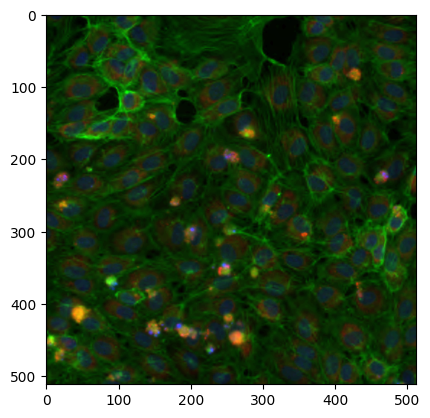

0.0


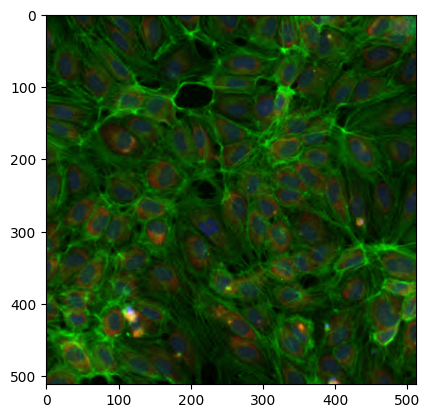

0.0


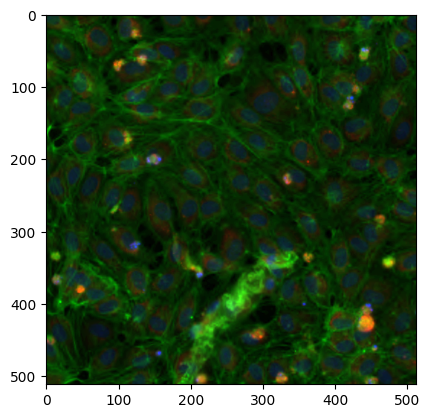

0.0


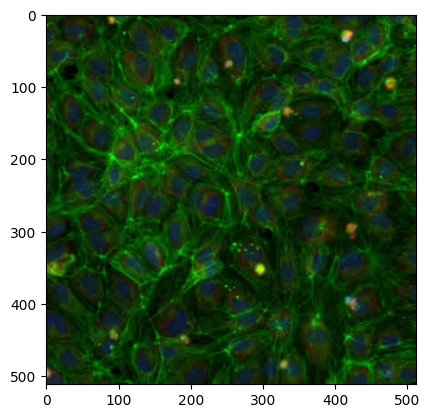

0.0


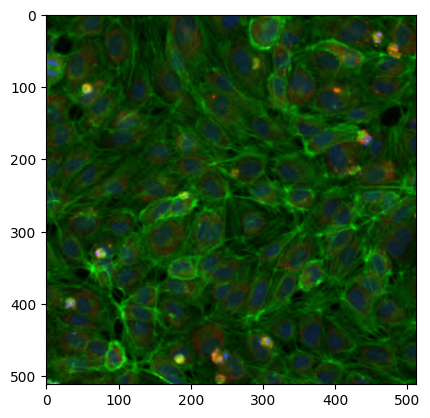

0.0


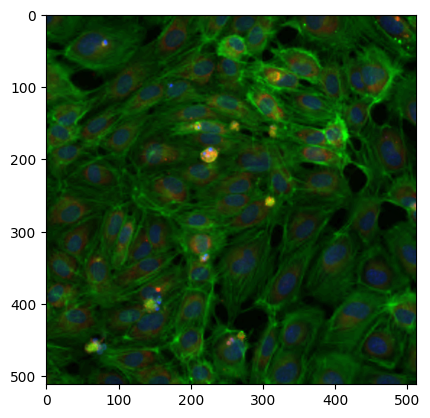

0.0


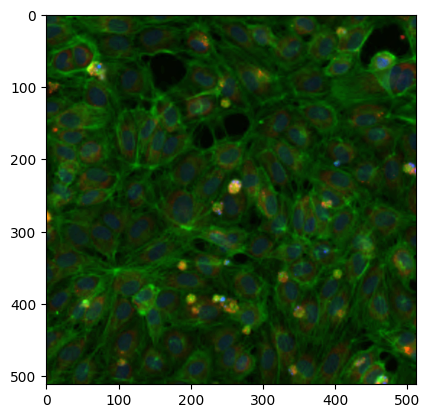

0.0


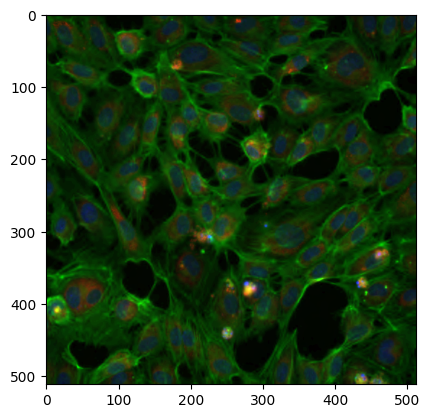

0.0


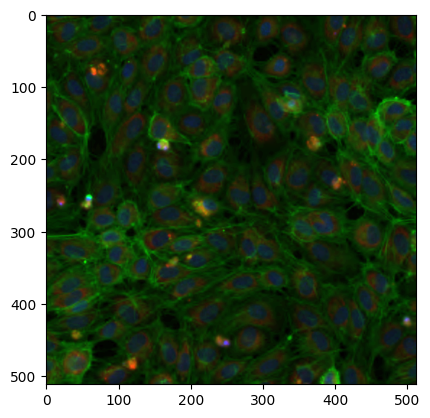

0.0


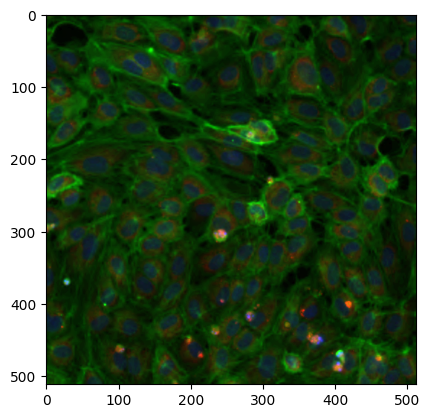

In [17]:
for i in range(0,6*10,6):
    plt.figure()
    x = np.zeros((512,512,3), )
    for o, j in zip([0,1,2],[1,2,0]):
        img_x = np.array(rxrx3_core[i+j]["jp2"]).astype(np.float32)
        min, max = np.percentile(img_x, 0.01), np.percentile(img_x, 99.99)
        x[:,:,o] = (rxrx3_core[i+j]["jp2"] - min)/(max-min)
    x = np.clip(x, 0.0, 1.0)
    print(x.min())
    plt.imshow(x)
    plt.show()

In [12]:
for col in rxrx3_core_metadata.columns:
    print(col, f"unique settings {rxrx3_core_metadata[col].value_counts().shape}")
    print(rxrx3_core_metadata[col].value_counts().head(50).to_markdown())

well_id unique settings (222601,)
| well_id              |   count |
|:---------------------|--------:|
| gene-176_1_P42       |       1 |
| compound-003_11_AD37 |       1 |
| compound-003_35_Y15  |       1 |
| compound-001_19_D20  |       1 |
| compound-001_11_U08  |       1 |
| compound-004_43_B08  |       1 |
| gene-032_7_D27       |       1 |
| compound-001_25_J22  |       1 |
| compound-002_1_F41   |       1 |
| gene-176_7_L29       |       1 |
| gene-176_7_AA47      |       1 |
| gene-176_5_G39       |       1 |
| gene-176_8_U07       |       1 |
| gene-176_4_P03       |       1 |
| gene-176_5_B42       |       1 |
| gene-176_3_P04       |       1 |
| gene-176_6_T19       |       1 |
| gene-176_4_W28       |       1 |
| gene-176_1_Z20       |       1 |
| gene-176_4_O36       |       1 |
| gene-176_5_K23       |       1 |
| gene-176_5_Z22       |       1 |
| gene-176_9_Y25       |       1 |
| gene-176_8_S06       |       1 |
| gene-176_4_B33       |       1 |
| gene-176_2_P46     

In [13]:
mapping = pd.DataFrame(rxrx3_core["__key__"]).reset_index().rename(columns={0: "paths", "index": "id"})

In [14]:
1335606/6

222601.0

In [44]:
unique_sites = [x.split("_")[1] for x in rxrx3_core["__key__"]]

In [46]:
set(unique_sites)

{'s1'}

In [ ]:
for i in range(10, 1000000, 1000): 
    print(rxrx3_core[i]["__key__"], rxrx3_core[i]["__key__"].split("_")[1])

NameError: name 'np' is not defined

In [15]:
rxrx3_core["train"].shape

(1335606, 2)